<a href="https://colab.research.google.com/github/dwirwlnd/dashboard_viper/blob/main/ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dwi Rahayu Wulanida
- **Email:** dwirwlnd@gmail.com
- **ID Dicoding:** dwirwlnd

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan harian toko?
- Apa produk yang paling banyak terjual dan paling sedikit terjual?
- Bagaimana rating dari customer terhadap layanan toko?
- Bagaimana profil demografi dari pelanggan yang dimiliki?

## Import Semua Packages/Library yang Digunakan

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [154]:
customers_df = pd.read_csv("/content/customers_dataset.csv")
customers_df.head(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC
6,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP
7,5e274e7a0c3809e14aba7ad5aae0d407,57b2a98a409812fe9618067b6b8ebe4f,35182,timoteo,MG
8,5adf08e34b2e993982a47070956c5c65,1175e95fb47ddff9de6b2b06188f7e0d,81560,curitiba,PR
9,4b7139f34592b3a31687243a302fa75b,9afe194fb833f79e300e37e580171f22,30575,belo horizonte,MG


In [155]:
items_df = pd.read_csv("/content/order_items_dataset.csv")
items_df.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [156]:
reviews_df = pd.read_csv("/content/order_reviews_dataset.csv")
reviews_df.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [157]:
orders_df = pd.read_csv("/content/orders_dataset.csv")
orders_df.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [158]:
products_df = pd.read_csv("/content/products_dataset.csv")
products_df.head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [159]:
producttrans_df = pd.read_csv("/content/product_category_name_translation.csv")
producttrans_df.head(10)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


**Insight:**
- Melakukan input masing-masing dataset
- Menampilkan 10 baris dari masing-masing dataset

### Assessing Data

####Data Customer

In [160]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- Data customer memiliki  jumlah data yang sama pada masing-masing atributnya yaitu 99441. Hal ini menunjukkan bahwa **tidak ada** missing value. Tetapi mari kita pastikan dengan run kode di bawah.

In [161]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [162]:
customers_df.duplicated().sum()

0

In [163]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
- Yap, dapat dipastikan data di atas tidak memiliki missing value.
- **Tidak ada** juga data yang duplicate
- **Tidak ada** keanehan dari data di atas

####Data Items

In [164]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- Data items memiliki  jumlah data yang sama pada masing-masing atributnya yaitu 112650. Hal ini menunjukkan bahwa **tidak ada** missing value.

In [165]:
items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [166]:
items_df.duplicated().sum()

0

In [167]:
items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Yap, dapat dipastikan data di atas tidak memiliki missing value.
- Tidak ada duplicate data
- Dan tidak ada yang aneh dari data di atas

####Data Reviews

In [168]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Insight:**
- Data order reviews memiliki  jumlah data yang tidak sama pada masing-masing atributnya. Hal ini menunjukkan bahwa **ada** missing value. Tetapi mari kita pastikan dengan run kode di bawah.

In [169]:
reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight:**
- Yap, dapat dipastikan data di atas memiliki missing value yang lumayan banyak. Tetapi, karena atribut yang kita butuhkan hanya review score, jadi kita abaikan saja.

In [170]:
reviews_df.duplicated().sum()

0

In [171]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**
- Tidak ada duplicate data
- Tidak ada keanehan pada data

####Data Orders

In [172]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Memiliki jumlah data yang berbeda, terdapat missing value di data dan juga terdapat atribut yang memiliki tipe data yang salah, yaitu order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date yang seharusnya bertipe timedate.

In [173]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
- Terdapat missing value di 3 atribut, tetapi karena ketiga atribut tersebut tidak diperlukan, jadi bisa di drop saja

In [174]:
orders_df.duplicated().sum()

0

In [175]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Tidak ada duplicate data
- Tidak ada yang aneh dari data di atas

####Data Product

In [176]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- Terdapat missing value tapi karena yang dibutuhkan hanya product_id dan category name, jadi yang lain bisa diabaikan

In [177]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


**Insight:**
- Terdapat missing value pada category name yang lumayan penting, jadi harus kita lakukan cleaning data

In [178]:
products_df.duplicated().sum()

0

In [179]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Tidak ada duplicate
- Tidak ada yang aneh dari data

####Data Product Translate

In [180]:
producttrans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- Tidak ada missing value

In [181]:
producttrans_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


In [182]:
producttrans_df.duplicated().sum()

0

**Insight:**
- Tidak ada duplicate data

In [183]:
producttrans_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Tidak ada yang aneh

### Cleaning Data

###Data Items

In [184]:
item = items_df.drop(["seller_id", "shipping_limit_date", "freight_value"], axis=1)

In [185]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.4+ MB


**Insight:**
- Melakukan drop atribut yang tidak diperlukan dari dataframe items sehingga menyisakan data atribut yang penting saja. Hal ini saya lakukan agar dataset yang digabungkan dan di convert ke csv nantinya tidak terlalu besar.

###Data Order

In [186]:
order = orders_df.drop(["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"], axis=1)

In [187]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  99441 non-null  object
 1   customer_id               99441 non-null  object
 2   order_status              99441 non-null  object
 3   order_purchase_timestamp  99441 non-null  object
dtypes: object(4)
memory usage: 3.0+ MB


**Insight:**
- Melakukan drop atribut yang tidak diperlukan dari dataframe order sehingga menyisakan data atribut yang penting saja.

In [188]:
order["order_purchase_timestamp"] = pd.to_datetime(order["order_purchase_timestamp"], format='mixed')

In [189]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  99441 non-null  object        
 1   customer_id               99441 non-null  object        
 2   order_status              99441 non-null  object        
 3   order_purchase_timestamp  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ MB


**Insight:**
- Mengubah tipe data order_purchase_timestamp yang bertipe object menjadi bertipe timedate

###Data Review

In [190]:
review = reviews_df.drop(["review_id", "review_comment_title", "review_comment_message", "review_creation_date", "review_answer_timestamp"], axis=1)

In [191]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      99224 non-null  object
 1   review_score  99224 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB


**Insight:**
- Melakukan drop atribut yang tidak diperlukan dari dataframe review sehingga menyisakan data atribut order_id dan review score yang akan digunakan untuk melihat rating yang diberikan customer

###Data Product

In [192]:
product = products_df.drop(["product_name_lenght", "product_description_lenght", "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm"], axis=1)

In [193]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


**Insight:**
- Melakukan drop atribut yang tidak diperlukan dari dataframe product sehingga menyisakan data atribut product_id dan product_category yang akan digunakan untuk melihat produk yang paling banyak/sedikit terjual

In [194]:
product[product.product_category_name.isna()]

,product_id,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN
154,46b48281eb6d663ced748f324108c733,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN
...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN


In [195]:
product.product_category_name.value_counts()

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


In [196]:
product.fillna(value="cama_mesa_banho", inplace=True)

**Insight:**
- Mengatasi missing value dengan melakukan imputation karena data masih penting dan akan sayang jika dibuang

In [197]:
product_category = pd.merge(
    left=product,
    right=producttrans_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_category.head()

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares


**Insight:**
- Melakukan penggabungan data product berbahasa brazil dengan data product berbahasa inggris, sehingga nantinya kita dapat menampilkan nama product dalam bahasa inggris agar lebih bisa dipahami pembaca.

## Exploratory Data Analysis (EDA)

### Explore Data Customer




In [198]:
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
53982,ad5c926ff77843378ead512cdef2bf85,c5f6047fb345ffd234cf5b26268988be,18305,capao bonito,SP
2495,19d47f016965370c2d298172268390e8,db094faaa9628ba9f5e5da127407f139,79530,alcinopolis,MS
43611,fdf0fe7cd1365ffdcbbc3b95273a20a5,6e328f26167e5c9f1c9ac765e6e95f4d,9111,santo andre,SP
44109,1d65236b903e944ca24271c42aa4a221,dc8148886a16779c8e9882d053b10049,13601,araras,SP
83952,dc0ebf4ca1f76e51ef0236126af5dcef,329123e2077790e16cdd89587d0e75b6,60030,fortaleza,CE
76830,23c13360469b4124896069bdfaa2d030,9a7741744b3760e6ab42c893d1dd9537,30882,belo horizonte,MG
63461,b4a943b76adacfbeb0d25b686e2b4e28,3ae06873cba30f3c3707165c58ae6f35,13031,campinas,SP
84460,64ba4b1cf394656f82a9dc6c051d8daf,4e09a8f99fac2f49d481059f32e912b3,8381,sao paulo,SP
40333,f656ac8f37b7201ead107c3dd7e82a4c,95f9c485da51027740f0d60017c0f5d1,26015,nova iguacu,RJ
73327,0b7b4c39c3d3a8846ea809fd5afbc1b1,b18336dae806782acf95a0c0dc1e267a,68695,tailandia,PA


**Insight:**
- Terdapat data city dan state, yang kita bisa gunakan untuk melihat pesebaran customer sesuai dengan city dan state nya

In [199]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


**Insight:**
- Diperoleh bahwa customer toko paling banyak adalah dari sao paulo city dengan 15540 customer dan paling sedikit di ibiara, rio espera, rio dos indios, rio dos cedros, dan lagoao city dengan 1 customer

In [200]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


**Insight:**
- Diperoleh bahwa customer toko paling banyak adalah dari Sao Paulo(SP) State dengan 41746 customer dan paling sedikit dari Roraima(RR) state dengan 46 customer

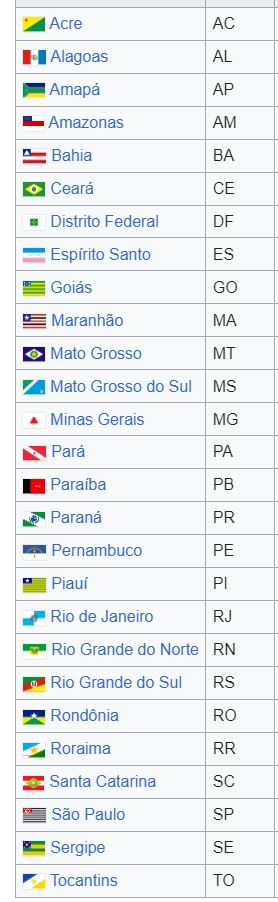

### Explore Data Items




In [201]:
item.describe(include="all")

,order_id,order_item_id,product_id,price
count,112650,112650.000000,112650,112650.000000
unique,98666,NaN,32951,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN
freq,21,NaN,527,NaN
mean,NaN,1.197834,NaN,120.653739
std,NaN,0.705124,NaN,183.633928
min,NaN,1.000000,NaN,0.850000
25%,NaN,1.000000,NaN,39.900000
50%,NaN,1.000000,NaN,74.990000
75%,NaN,1.000000,NaN,134.900000


In [202]:
item.groupby(by="price").agg({
    "order_id": "nunique",
    "price": ["max", "min", "mean", "std"]
})

order_id    price                       
         nunique      max      min     mean  std
price                                           
0.85           3     0.85     0.85     0.85  0.0
1.20           1     1.20     1.20     1.20  0.0
2.20           1     2.20     2.20     2.20  NaN
2.29           1     2.29     2.29     2.29  NaN
2.90           1     2.90     2.90     2.90  NaN
...          ...      ...      ...      ...  ...
4690.00        1  4690.00  4690.00  4690.00  NaN
4799.00        1  4799.00  4799.00  4799.00  NaN
6499.00        1  6499.00  6499.00  6499.00  NaN
6729.00        1  6729.00  6729.00  6729.00  NaN
6735.00        1  6735.00  6735.00  6735.00  NaN

[5968 rows x 5 columns]

**Insight:**
- Kita bisa melihat bahwa terdapat 3 orderan yang seharga di atas 5000 dollar

###Explore Data Orders

In [203]:
order.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp
count,99441,99441,99441,99441
unique,99441,99441,8,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN
freq,1,1,96478,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120
min,NaN,NaN,NaN,2016-09-04 21:15:19
25%,NaN,NaN,NaN,2017-09-12 14:46:19
50%,NaN,NaN,NaN,2018-01-18 23:04:36
75%,NaN,NaN,NaN,2018-05-04 15:42:16
max,NaN,NaN,NaN,2018-10-17 17:30:18


**Insight:**
- Kita bisa melihat bagaimana status order dari data di atas.

In [204]:
order.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


**Insight:**
- Dari data di atas, diperoleh bahwa sudah ada 96478 orderan yang berhasil di delivered.

###Explore Data Reviews

In [205]:
review.describe(include="all")

,order_id,review_score
count,99224,99224.000000
unique,98673,NaN
top,c88b1d1b157a9999ce368f218a407141,NaN
freq,3,NaN
mean,NaN,4.086421
std,NaN,1.347579
min,NaN,1.000000
25%,NaN,4.000000
50%,NaN,5.000000
75%,NaN,5.000000


In [206]:
review.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

,order_id
review_score,
5,57076
4,19098
1,11393
3,8160
2,3148


**Insight:**
- Dari data di atas, diperoleh bahwa banyak customer yang merasa puas berbelanja di toko ini, dengan rating 5 sebanyak 57076 dan rating 1 sebanyak 11393

###Explore Data Product

In [207]:
product_category.describe(include="all")

,product_id,product_category_name,product_category_name_english
count,32951,32951,32938
unique,32951,73,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,bed_bath_table
freq,1,3639,3639


In [208]:
product_category.groupby(by="product_category_name_english").product_id.nunique().sort_values(ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3639
sports_leisure,2867
furniture_decor,2657
health_beauty,2444
housewares,2335
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


**Insight:**
- Dari data di atas, diperoleh bahwa product bed_bath_table adalah yang paling laris yaitu 3639, dan cds_dvds_musicals adalah yang paling kurang diminati yaitu 1

###Explore Data Customers dan Orders

In [209]:
orders_customers_df = pd.merge(
    left=customers_df,
    right=order,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30


In [210]:
orders_customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [211]:
orders_customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,customer_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


In [212]:
orders_customers_df.groupby(by="order_status").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

,order_status,customer_id
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


**Insight:**
- Menggabungkan data customer dan order

###Explore Data orders_customer dan reviews

In [213]:
product_reviewed_df = pd.merge(
    left=orders_customers_df,
    right=review,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
product_reviewed_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,5.0


**Insight:**
- Menggabungkan data order_customer dengan data review

###Explore Data Product Category dan Data Items

In [214]:
product_sold_df = pd.merge(
    left=product_category,
    right=item,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
product_sold_df.head()

,product_id,product_category_name,product_category_name_english,order_id,order_item_id,price
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery,e17e4f88e31525f7deef66779844ddce,1,10.91
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art,5236307716393b7114b53ee991f36956,1,248.00
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure,01f66e58769f84129811d43eefd187fb,1,79.80
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby,143d00a4f2dde4e0364ee1821577adb3,1,112.30
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,37.90


In [215]:
product_sold_df.groupby(by="product_category_name_english").price.nunique().sort_values(ascending=False).reset_index().head(20)

,product_category_name_english,price
0,health_beauty,1263
1,sports_leisure,1139
2,housewares,1110
3,bed_bath_table,1068
4,computers_accessories,1003
5,auto,869
6,watches_gifts,863
7,furniture_decor,788
8,toys,650
9,garden_tools,623


**Insight:**
- Health beauty memiliki total price terbesar yaitu 1263 dollar

###Explore All Data

In [216]:
all_df = pd.merge(
    left=product_reviewed_df,
    right=product_sold_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,review_score,product_id,product_category_name,product_category_name_english,order_item_id,price
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,4.0,a9516a079e37a9c9c36b9b78b10169e8,moveis_escritorio,office_furniture,1.0,124.99
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,5.0,4aa6014eceb682077f9dc4bffebc05b0,utilidades_domesticas,housewares,1.0,289.00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,5.0,bd07b66896d6f1494f5b86251848ced7,moveis_escritorio,office_furniture,1.0,139.94
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,5.0,a5647c44af977b148e0a3a4751a09e2e,moveis_escritorio,office_furniture,1.0,149.94
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,5.0,9391a573abe00141c56e38d84d7d5b3b,casa_conforto,home_confort,1.0,230.00


**Insight:**
- Menggabungkan semua data menjadi satu dataset all_df.

In [217]:
all_df.groupby(by=["customer_state", "product_category_name_english"]).agg({
    "price": "sum",
}).sort_values(by="price", ascending=False)

price
customer_state product_category_name_english           
SP             bed_bath_table                 551537.63
               health_beauty                  463574.10
               watches_gifts                  435773.81
               sports_leisure                 388405.97
               computers_accessories          355033.97
...                                                 ...
AL             drinks                             15.49
PR             home_comfort_2                     12.90
ES             home_comfort_2                     12.90
BA             home_comfort_2                     12.90
MS             costruction_tools_tools             6.80

[1356 rows x 1 columns]

**Insight:**
- Wow, product yang paling menguntungkan adalah produk bed_bath_table yang kebanyakan dibeli oleh customer negara SP

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penjualan dan revenue harian toko?

In [218]:
daily_orders_df = all_df.resample(rule='D', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
daily_orders_df.index = daily_orders_df.index.strftime('%Y-%m-%d')
daily_orders_df = daily_orders_df.reset_index()
daily_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)
daily_orders_df.head()

,order_purchase_timestamp,order_count,revenue
0,2016-09-04,1,72.89
1,2016-09-05,1,59.50
2,2016-09-06,0,0.00
3,2016-09-07,0,0.00
4,2016-09-08,0,0.00


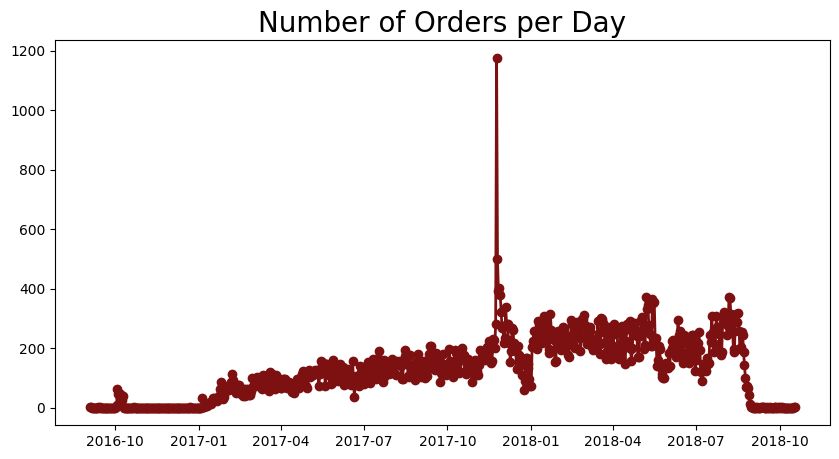

In [219]:
daily_orders_df = all_df.resample(rule='D', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "price": "sum"
})
#daily_orders_df.index = daily_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

daily_orders_df = daily_orders_df.reset_index()
daily_orders_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(daily_orders_df["order_purchase_timestamp"], daily_orders_df["order_count"], marker='o', linewidth=2, color="#7d1010")
plt.title("Number of Orders per Day", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

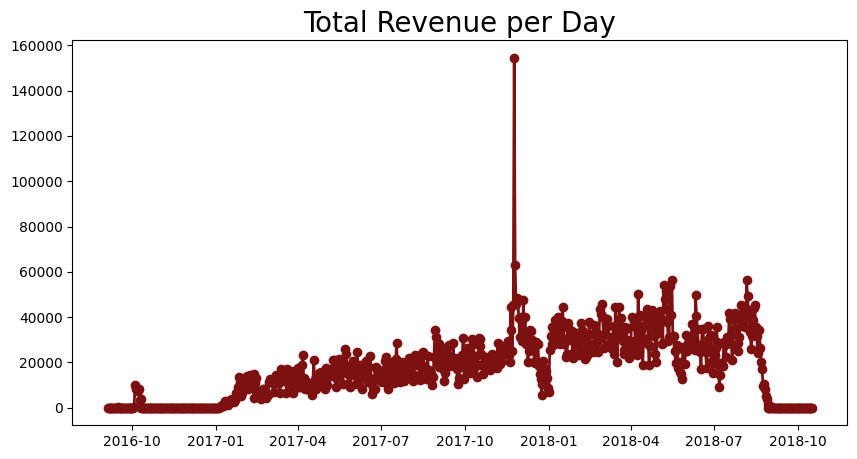

In [220]:
plt.figure(figsize=(10, 5))
plt.plot(
    daily_orders_df["order_purchase_timestamp"],
    daily_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#7d1010"
)
plt.title("Total Revenue per Day", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Wow, di atas adalah grafik mengenai daily revenue di toko Olist. Dikarenakan dalam bentuk harian, jadi belum terlalu terlihat trennya. Namun, ketika sudah di dashboard kita dapat memilih date range sendiri sehingga kita dapat mengetahui tren dala periode tertentu.

### Pertanyaan 2: Apa produk yang paling banyak terjual dan paling sedikit terjual?

In [221]:
most_least_favorito = all_df.groupby("product_category_name_english").order_id.nunique().sort_values(ascending=False).reset_index()
most_least_favorito.head(15)

,product_category_name_english,order_id
0,bed_bath_table,10860
1,health_beauty,8836
2,sports_leisure,7720
3,computers_accessories,6689
4,furniture_decor,6449
5,housewares,5884
6,watches_gifts,5624
7,telephony,4199
8,auto,3897
9,toys,3886


<ipython-input-222-5cf5b1279f5b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english", data=most_least_favorito.head(5), palette=colors, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seabor

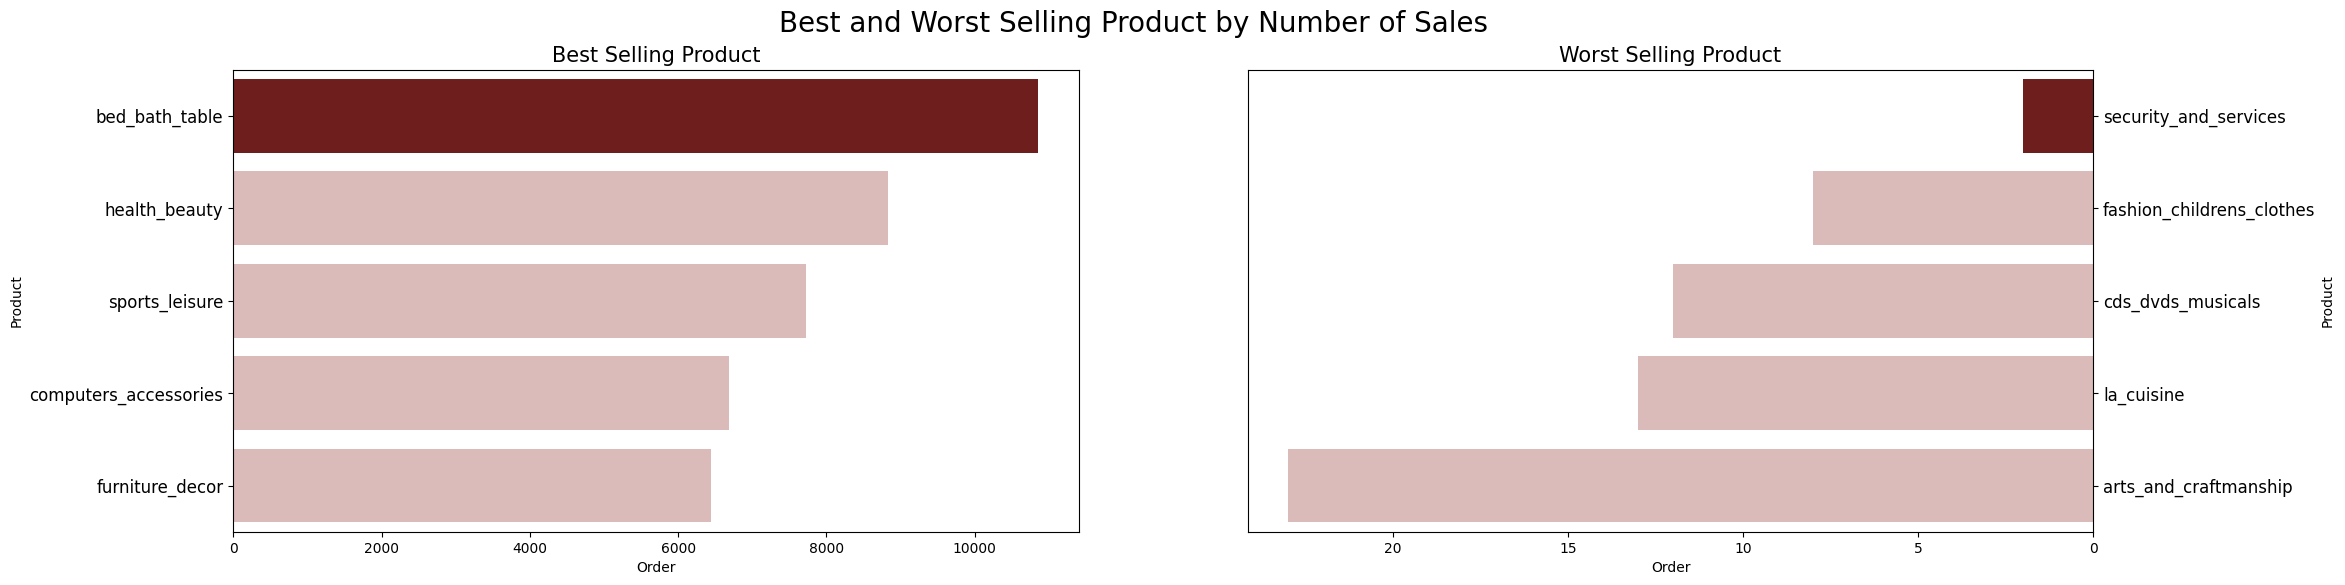

In [222]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#7d1010", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4"]

sns.barplot(x="order_id", y="product_category_name_english", data=most_least_favorito.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel("Product")
ax[0].set_xlabel("Order")
ax[0].set_title("Best Selling Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="order_id", y="product_category_name_english", data=most_least_favorito.sort_values(by="order_id", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel("Product")
ax[1].set_xlabel("Order")
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Selling Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Selling Product by Number of Sales", fontsize=20)
plt.show()

**Insight:**
- Product Bed_bath_table adalah produk paling laris di toko, diikuti dengan produk health_beauty
- Produk security dan services adalah produk paling sedikit terjual di toko

### Pertanyaan 3: Bagaimana rating dari customer terhadap layanan toko?

<ipython-input-223-ac44f916ad32>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

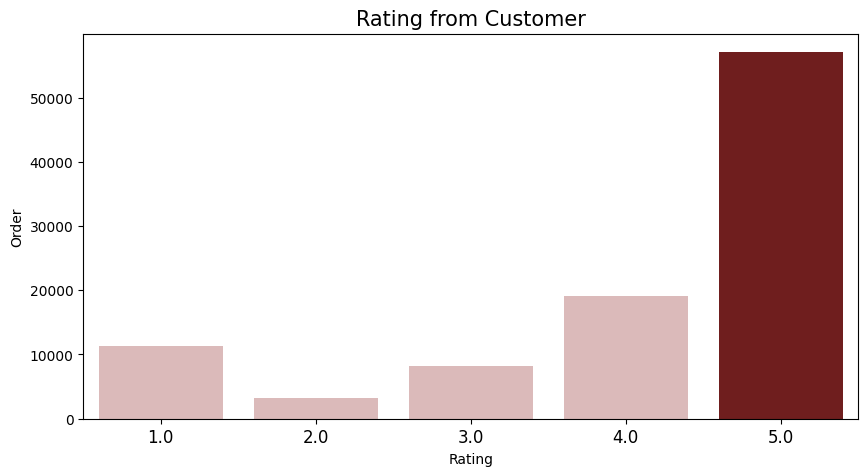

In [223]:
ratings = all_df.groupby(by="review_score").order_id.nunique().reset_index()
ratings.rename(columns={
    "order_id": "order_count"
}, inplace=True)

colors = ["#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#7d1010"]

plt.figure(figsize=(10, 5))

sns.barplot(
    y="order_count",
    x="review_score",
    data=ratings.sort_values(by="order_count", ascending=False),
    palette=colors
)
plt.title("Rating from Customer", loc="center", fontsize=15)
plt.ylabel("Order")
plt.xlabel("Rating")
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Insight:**
- Banyak Customer merasa puas dengan pelayanan yang diberikan oleh toko, dibuktikan dengan banyaknya jumlah order yang memiliki rating 5. Hal ini berarti customer merasa percaya dengan pelayanan toko dan berkemungkinan untuk repurchase.

## Pertanyaan 4: Bagaimana profil demografi dari pelanggan yang dimiliki?

####Berdasarkan Kota

In [224]:
most_least_city = all_df.groupby("customer_city").customer_id.nunique().sort_values(ascending=False).reset_index()
most_least_city.head(15)

,customer_city,customer_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


<ipython-input-225-7dac65c265e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_id", y="customer_city", data=most_least_city.head(10), palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarn

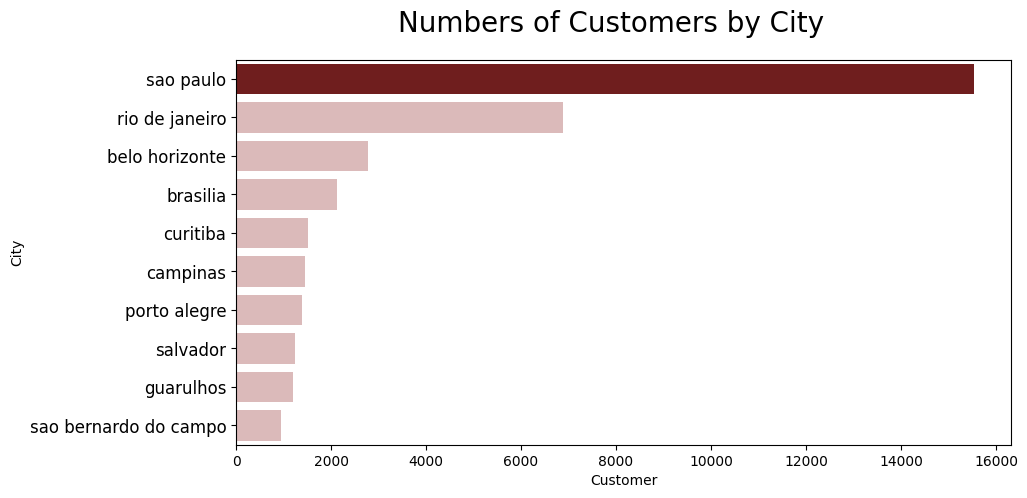

In [225]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = ["#7d1010", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4"]

sns.barplot(x="customer_id", y="customer_city", data=most_least_city.head(10), palette=colors)
ax.set_ylabel("City")
ax.set_xlabel("Customer")
ax.tick_params(axis ='y', labelsize=12)


plt.suptitle("Numbers of Customers by City", fontsize=20)
plt.show()

####Berdasarkan Negara

<ipython-input-226-3c390503b495>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

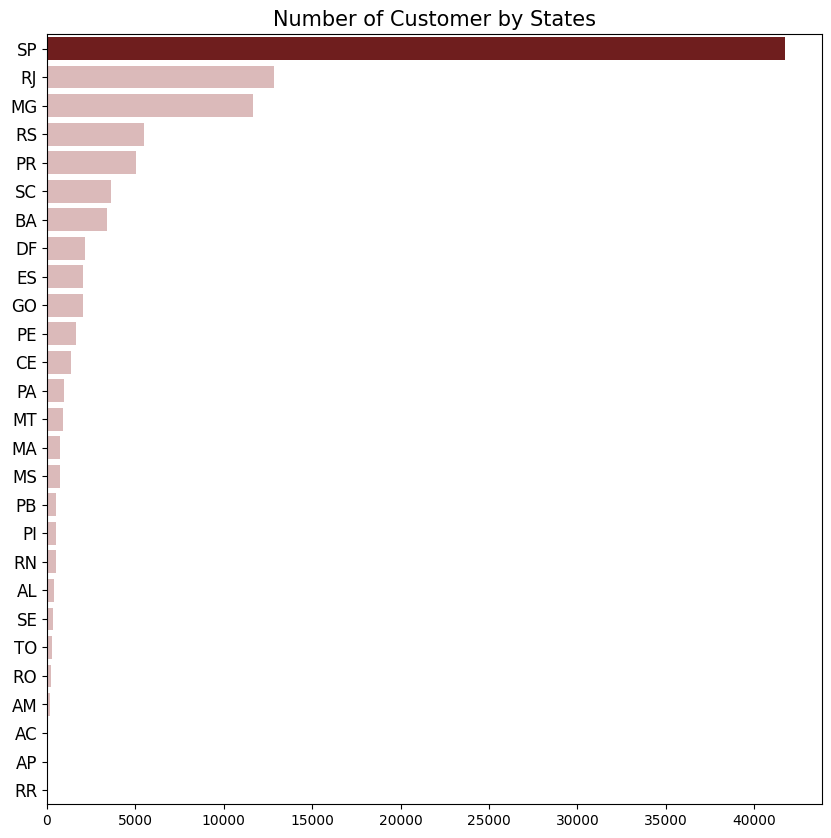

In [226]:
most_least_state = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
most_least_state.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
most_least_state
plt.figure(figsize=(10, 10))
colors_ = ["#7d1010", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4",
           "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4", "#e0b4b4"]
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=most_least_state.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

**Conclusion pertanyaan 1**
- Penjualan harian terus mengalami peningkatan setiap harinya, begitu juga dengan revenue yang diperoleh.
- Terdapat peak penjualan di akhir tahun 2017 yang tiba-tiba meningkat sangat drastis.
- Besar revenue yang diperoleh berbanding lurus dengan banyak penjualan.

**Conclusion pertanyaan 2**
- Penjualan produk terlaris adalah penjualan bed_bath_table
- Penjualan produk terburuk adalah penjualan security_and_services
- Pihak toko perlu mulai mempromosikan produk security_and_services sehingga menjadi lebih diminati pelanggan

**Conclusion pertanyaan 3**
- Dengan rating 5 sebanyak itu, pihak toko berhasil mengerjakan tugasnya dengan baik. Hal ini membuat pelanggan merasa percaya dengan toko dan akan kembali lagi untuk membeli produk yang lain.

**Conclusion pertanyaan 4**
- Berdasarkan city, kebanyakan pelanggan berasal dari kota sao paulo sedangkan paling sedikit di kota sao bernardo do campo
- Berdasarkan state, kebanyakan pelanggan berasal dari negara sao paulo sedangkan paling sedikit di negara Roraima
- Hal ini mungkin bisa terjadi karena jarak tempuh yang lumayan jauh atau negara terpencil, sehingga terlalu menghabiskan biaya di ongkir pengiriman.

In [227]:
all_df.to_csv("all_data.csv", index=False)